In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-pa

In [2]:
df = pd.read_csv("NEW-DATA-3.T15.txt", sep=' ', parse_dates=[['1:Date', '2:Time']])

In [3]:
df.head()

,1:Date_2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,2012-04-18 00:00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,14.1600,...,0.0,0.0,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0
1,2012-04-18 00:15:00,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,14.7600,...,0.0,0.0,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0
2,2012-04-18 00:30:00,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,14.9547,...,0.0,0.0,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0
3,2012-04-18 00:45:00,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,15.0520,...,0.0,0.0,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0
4,2012-04-18 01:00:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,15.2147,...,0.0,0.0,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0


In [4]:
df.dtypes

1:Date_2:Time                      datetime64[ns]
3:Temperature_Comedor_Sensor              float64
4:Temperature_Habitacion_Sensor           float64
5:Weather_Temperature                     float64
6:CO2_Comedor_Sensor                      float64
7:CO2_Habitacion_Sensor                   float64
8:Humedad_Comedor_Sensor                  float64
9:Humedad_Habitacion_Sensor               float64
10:Lighting_Comedor_Sensor                float64
11:Lighting_Habitacion_Sensor             float64
12:Precipitacion                          float64
13:Meteo_Exterior_Crepusculo              float64
14:Meteo_Exterior_Viento                  float64
15:Meteo_Exterior_Sol_Oest                float64
16:Meteo_Exterior_Sol_Est                 float64
17:Meteo_Exterior_Sol_Sud                 float64
18:Meteo_Exterior_Piranometro             float64
19:Exterior_Entalpic_1                      int64
20:Exterior_Entalpic_2                      int64
21:Exterior_Entalpic_turbo                  int64


In [5]:
df=df.rename(columns={"1:Date_2:Time":"Date_Time"})

In [6]:
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

In [7]:
data.head()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
Date_Time,,,,,,,,,,,,,,,,,,,,,
2012-04-18 00:00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,14.1600,0.0,...,0.0,0.0,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0
2012-04-18 00:15:00,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,14.7600,0.0,...,0.0,0.0,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0
2012-04-18 00:30:00,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,14.9547,0.0,...,0.0,0.0,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0
2012-04-18 00:45:00,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,15.0520,0.0,...,0.0,0.0,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0
2012-04-18 01:00:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,15.2147,0.0,...,0.0,0.0,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0


In [8]:
data=data.rename(columns={"3:Temperature_Comedor_Sensor":"3:Temperature_Dinning_Sensor",
                   "4:Temperature_Habitacion_Sensor": "4:Temperature_Room_Sensor",
                  "6:CO2_Comedor_Sensor": "6:CO2_Dinning_Sensor",
                  "7:CO2_Habitacion_Sensor":"7:CO2_Room_Sensor",
                  "8:Humedad_Comedor_Sensor":"8:Humid_Dinning_Sensor",
                  "9:Humedad_Habitacion_Sensor":"9:Humid_Room_Sensor",
                  "10:Lighting_Comedor_Sensor":"10:Lighting_Dinning_Sensor",
                  "11:Lighting_Habitacion_Sensor":"11:Lighting_Room_Sensor",
                  "13:Meteo_Exterior_Crepusculo":"13:Sun_Dusk",
                  "14:Meteo_Exterior_Viento":"14:Win",
                  "15:Meteo_Exterior_Sol_Oest":"15:Sunlight_West",
                  "16:Meteo_Exterior_Sol_Est":"16:Sunlight_East",
                   "17:Meteo_Exterior_Sol_Sud":"17:Sunlight_South",
                   "18:Meteo_Exterior_Piranometro":"18:Sun_Irradiance",
                "23:Humedad_Exterior_Sensor":"23:Humid_Exterior_Sensor"})

In [9]:
data.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,6:CO2_Dinning_Sensor,7:CO2_Room_Sensor,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,12:Precipitacion,...,15:Sunlight_West,16:Sunlight_East,17:Sunlight_South,18:Sun_Irradiance,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,24:Day_Of_Week
Date_Time,,,,,,,,,,,,,,,,,,,,,
2012-04-18 00:00:00,20.2000,19.8000,13.0,207.840,206.560,31.5800,30.1600,11.7200,14.1600,0.0,...,0.0,0.0,0.0,-3.12000,0,0,0,16.0700,39.0800,3.0
2012-04-18 00:15:00,20.1593,19.7600,13.0,207.499,206.101,31.6240,30.0613,11.5240,14.7600,0.0,...,0.0,0.0,0.0,-2.80800,0,0,0,16.0400,38.9680,3.0
2012-04-18 00:30:00,20.0740,19.6580,13.0,207.360,206.805,31.6507,30.1773,11.6220,14.9547,0.0,...,0.0,0.0,0.0,-2.96400,0,0,0,16.0160,38.9467,3.0
2012-04-18 00:45:00,19.9773,19.5833,13.0,207.445,206.325,31.6987,30.2560,11.7847,15.0520,0.0,...,0.0,0.0,0.0,-3.02933,0,0,0,15.9427,39.0760,3.0
2012-04-18 01:00:00,19.8933,19.5000,13.0,207.840,205.952,31.7707,30.3840,11.5887,15.2147,0.0,...,0.0,0.0,0.0,-2.88600,0,0,0,15.8627,40.0413,3.0


In [10]:
data = data.drop(['6:CO2_Dinning_Sensor','7:CO2_Room_Sensor','12:Precipitacion','15:Sunlight_West',
             '16:Sunlight_East','19:Exterior_Entalpic_1','20:Exterior_Entalpic_2','21:Exterior_Entalpic_turbo','24:Day_Of_Week'], axis=1)

In [11]:
data.index = df.Date_Time
values = data.values

In [12]:
data.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor
Date_Time,,,,,,,,,,,,,
2012-04-18 00:00:00,20.2000,19.8000,13.0,31.5800,30.1600,11.7200,14.1600,0.65,0.000000,0.0,-3.12000,16.0700,39.0800
2012-04-18 00:15:00,20.1593,19.7600,13.0,31.6240,30.0613,11.5240,14.7600,0.65,0.000000,0.0,-2.80800,16.0400,38.9680
2012-04-18 00:30:00,20.0740,19.6580,13.0,31.6507,30.1773,11.6220,14.9547,0.65,0.088000,0.0,-2.96400,16.0160,38.9467
2012-04-18 00:45:00,19.9773,19.5833,13.0,31.6987,30.2560,11.7847,15.0520,0.65,0.127333,0.0,-3.02933,15.9427,39.0760
2012-04-18 01:00:00,19.8933,19.5000,13.0,31.7707,30.3840,11.5887,15.2147,0.65,0.000000,0.0,-2.88600,15.8627,40.0413


In [13]:
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]

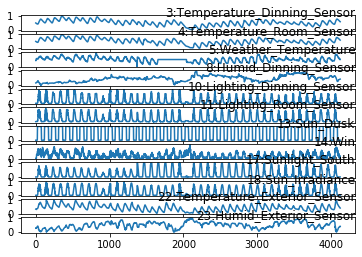

In [24]:
from matplotlib import pyplot

i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled[0]

array([5.03528341e-01, 4.99313187e-01, 4.48275862e-01, 1.55436408e-01,
       8.21761978e-02, 9.69749745e-03, 1.86761806e-02, 6.93998310e-05,
       0.00000000e+00, 0.00000000e+00, 9.50715823e-04, 3.31002138e-01,
       2.73451638e-01, 5.01212156e-01, 4.97023810e-01, 4.48275862e-01,
       1.56701357e-01, 7.93832258e-02, 7.75799796e-03, 2.26329985e-02,
       6.93998310e-05, 0.00000000e+00, 0.00000000e+00, 1.23465557e-03,
       3.29551789e-01, 2.71632233e-01, 4.96357842e-01, 4.91185897e-01,
       4.48275862e-01, 1.57468951e-01, 8.26657461e-02, 8.72774771e-03,
       2.39169860e-02, 6.93998310e-05, 1.39211210e-02, 0.00000000e+00,
       1.09268570e-03, 3.28391509e-01, 2.71286222e-01, 4.90854769e-01,
       4.86910485e-01, 4.48275862e-01, 1.58848896e-01, 8.48927663e-02,
       1.03377302e-02, 2.45586499e-02, 6.93998310e-05, 2.01433875e-02,
       0.00000000e+00, 1.03323126e-03, 3.24847822e-01, 2.73386659e-01,
       4.86074437e-01, 4.82142857e-01, 4.48275862e-01, 1.60918813e-01,
      

In [26]:
from pandas import DataFrame
from pandas import concat
def to_supervised(data,dropNa = True,lag = 1):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    features = data.shape[1]
    df = df.values
    supervised_data = df[:,:features*lag]
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    return supervised_data



# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [27]:
n_hours = 10
n_features = 13 
reframed = series_to_supervised(scaled, n_hours, 1)
values = reframed.values
n_train_hours = 30 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(720, 130) 720 (720,)


In [31]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(720, 10, 13) (720,) (3397, 10, 13) (3397,)


# LSTM Model Timeseries

In [32]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1)
         )
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=15, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 720 samples, validate on 3397 samples
Epoch 1/200
 - 1s - loss: 0.1794 - val_loss: 0.1299
Epoch 2/200
 - 1s - loss: 0.0511 - val_loss: 0.1391
Epoch 3/200
 - 1s - loss: 0.0454 - val_loss: 0.0807
Epoch 4/200
 - 1s - loss: 0.0287 - val_loss: 0.0971
Epoch 5/200
 - 1s - loss: 0.0451 - val_loss: 0.1224
Epoch 6/200
 - 1s - loss: 0.0449 - val_loss: 0.0737
Epoch 7/200
 - 1s - loss: 0.0336 - val_loss: 0.1076
Epoch 8/200
 - 1s - loss: 0.0628 - val_loss: 0.0780
Epoch 9/200
 - 1s - loss: 0.0477 - val_loss: 0.0795
Epoch 10/200
 - 1s - loss: 0.0300 - val_loss: 0.0815
Epoch 11/200
 - 1s - loss: 0.0297 - val_loss: 0.0678
Epoch 12/200
 - 1s - loss: 0.0231 - val_loss: 0.0862
Epoch 13/200
 - 1s - loss: 0.0367 - val_loss: 0.0848
Epoch 14/200
 - 1s - loss: 0.0362 - val_loss: 0.0839
Epoch 15/200
 - 1s - loss: 0.0349 - val_loss: 0.0835
Epoch 16/200
 - 1s - loss: 0.0336 - val_loss: 0.0854
Epoch 17/200
 - 1s - loss: 0.0341 - val_loss: 0.0858
Epoch 18/200
 - 1s - loss: 0.0357 - val_loss: 0.0905
Epoch 19

Epoch 154/200
 - 1s - loss: 0.0186 - val_loss: 0.0461
Epoch 155/200
 - 1s - loss: 0.0195 - val_loss: 0.0435
Epoch 156/200
 - 1s - loss: 0.0233 - val_loss: 0.0384
Epoch 157/200
 - 1s - loss: 0.0228 - val_loss: 0.0359
Epoch 158/200
 - 1s - loss: 0.0225 - val_loss: 0.0374
Epoch 159/200
 - 1s - loss: 0.0205 - val_loss: 0.0467
Epoch 160/200
 - 1s - loss: 0.0194 - val_loss: 0.0501
Epoch 161/200
 - 1s - loss: 0.0199 - val_loss: 0.0430
Epoch 162/200
 - 1s - loss: 0.0245 - val_loss: 0.0336
Epoch 163/200
 - 1s - loss: 0.0198 - val_loss: 0.0447
Epoch 164/200
 - 1s - loss: 0.0202 - val_loss: 0.0465
Epoch 165/200
 - 1s - loss: 0.0198 - val_loss: 0.0513
Epoch 166/200
 - 1s - loss: 0.0210 - val_loss: 0.0501
Epoch 167/200
 - 1s - loss: 0.0205 - val_loss: 0.0512
Epoch 168/200
 - 1s - loss: 0.0186 - val_loss: 0.0526
Epoch 169/200
 - 1s - loss: 0.0225 - val_loss: 0.0389
Epoch 170/200
 - 1s - loss: 0.0186 - val_loss: 0.0568
Epoch 171/200
 - 1s - loss: 0.0172 - val_loss: 0.0520
Epoch 172/200
 - 1s - loss: 

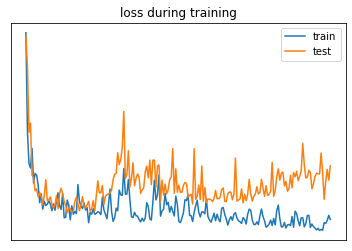

In [32]:
plt.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.legend()
plt.yticks([])
plt.xticks([])
plt.title("loss during training")
plt.show()

In [21]:
from math import sqrt
from numpy import concatenate
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
pred = .predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
rmse = sqrt(mean_squared_error(test_y,pred))
print('Test RMSE: %.3f' % rmse)
y_pred=[]
for i in range(0,3407):   
    arrtolist=pred[i].tolist()    
    y_pred.append(arrtolist[0])
y_Test = []
for i in range(0,3407):   
    arrtolist=test_y[i].tolist()    
    y_Test.append(arrtolist)
print("Pearson Correlation for LSTM Timeseries Model")
correlation, p_value = stats.pearsonr(y_Test,y_pred)
print(correlation)
scorr, p = stats.spearmanr(y_Test,y_pred)
print("Spearman Correlation for LSTM Timeseries Model")
print(scorr)

Test RMSE: 0.025
Pearson Correlation for LSTM Timeseries Model
0.9918584032883938
Spearman Correlation for LSTM Timeseries Model
0.9938071793393369


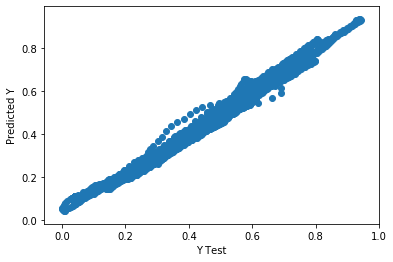

In [22]:
plt.scatter(y_Test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()